In [8]:
import os
import pandas as pd

csv_path = "../logs/web_ppo_explorer_eval.csv"

if not os.path.exists(csv_path):
    print("CSV not found. Checking alternative path...")

    alt = "logs/web_ppo_explorer_eval.csv"
    if os.path.exists(alt):
        csv_path = alt
    else:
        raise FileNotFoundError(f"CSV not found at either path.\nChecked:\n 1) {csv_path}\n 2) {alt}")

df = pd.read_csv(csv_path)
df.head()

,episode,total_reward,final_page,error_flag
0,1,16.0,done,False
1,2,14.0,done,False
2,3,14.0,done,False
3,4,10.0,done,False
4,5,16.0,done,False


In [9]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   episode       30 non-null     int64  
 1   total_reward  30 non-null     float64
 2   final_page    30 non-null     object 
 3   error_flag    30 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 882.0+ bytes


(None,
          episode  total_reward
 count  30.000000     30.000000
 mean   15.500000     15.400000
 std     8.803408      1.404426
 min     1.000000     10.000000
 25%     8.250000     16.000000
 50%    15.500000     16.000000
 75%    22.750000     16.000000
 max    30.000000     16.000000)

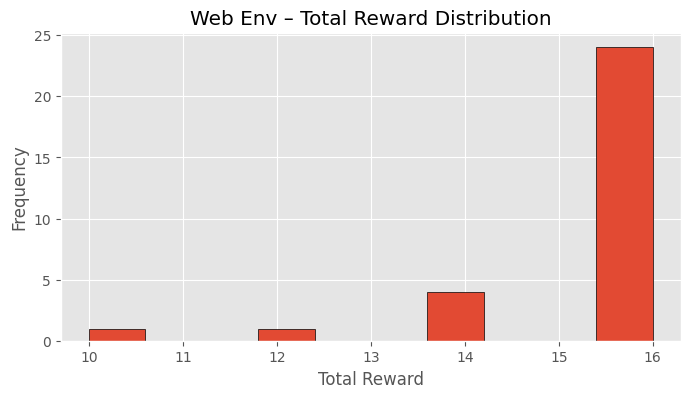

In [10]:
plt.figure(figsize=(8, 4))
plt.hist(df["total_reward"], bins=10, edgecolor="black")
plt.title("Web Env – Total Reward Distribution")
plt.xlabel("Total Reward")
plt.ylabel("Frequency")
plt.show()

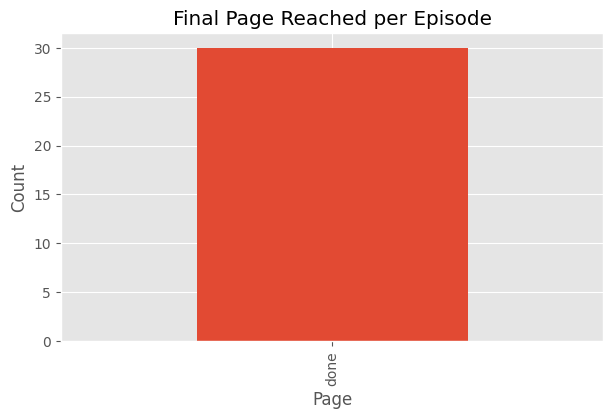

In [11]:
plt.figure(figsize=(7, 4))
df["final_page"].value_counts().plot(kind="bar")
plt.title("Final Page Reached per Episode")
plt.xlabel("Page")
plt.ylabel("Count")
plt.show()

In [12]:
error_rate = df["error_flag"].mean()
print(f"Error rate: {error_rate:.2f}")

Error rate: 0.00


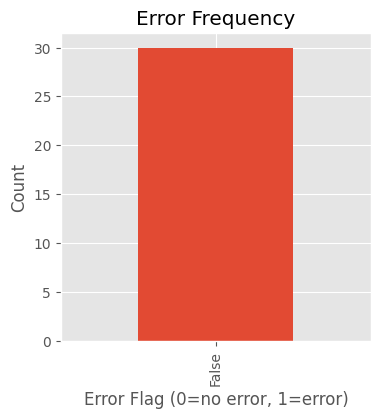

In [13]:
plt.figure(figsize=(4, 4))
df["error_flag"].value_counts().plot(kind="bar")
plt.title("Error Frequency")
plt.xlabel("Error Flag (0=no error, 1=error)")
plt.ylabel("Count")
plt.show()

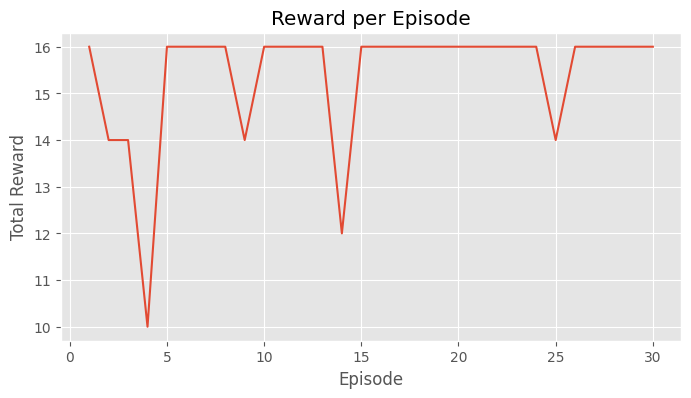

In [14]:
plt.figure(figsize=(8, 4))
plt.plot(df["episode"], df["total_reward"])
plt.title("Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

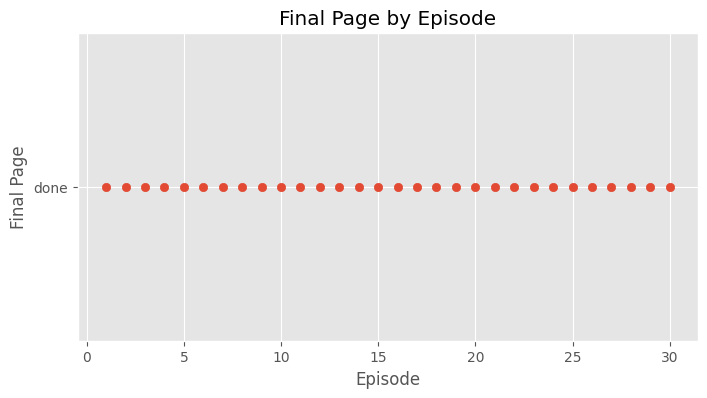

In [15]:
plt.figure(figsize=(8, 4))
plt.scatter(df["episode"], df["final_page"])
plt.title("Final Page by Episode")
plt.xlabel("Episode")
plt.ylabel("Final Page")
plt.show()